In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv


In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot  as plt
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [3]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv')

In [4]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df.isnull().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [6]:
df.shape

(53043, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [9]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [10]:
df.isnull().sum()

statement    362
status         0
dtype: int64

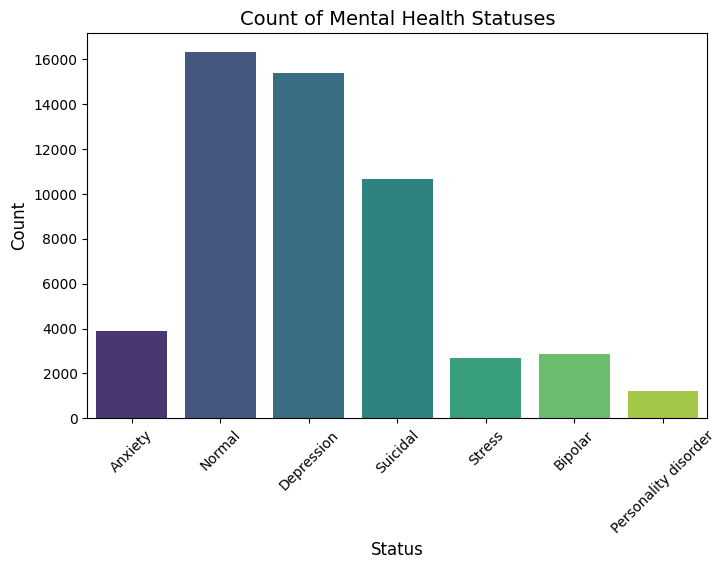

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', palette='viridis')
plt.title('Count of Mental Health Statuses', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

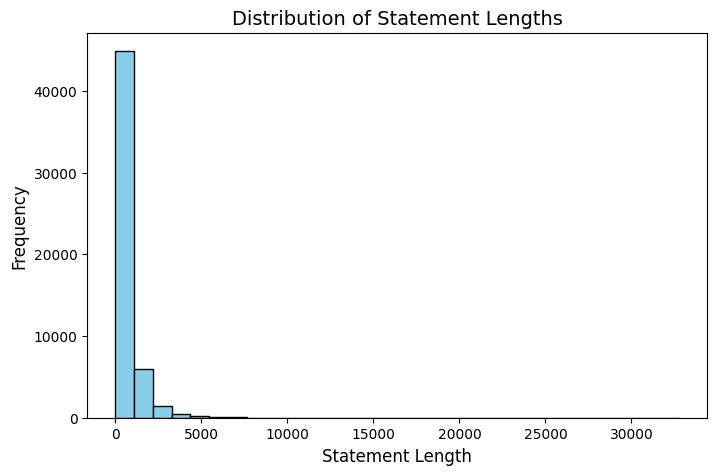

In [12]:
df['statement_length'] = df['statement'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 5))
plt.hist(df['statement_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Statement Lengths', fontsize=14)
plt.xlabel('Statement Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

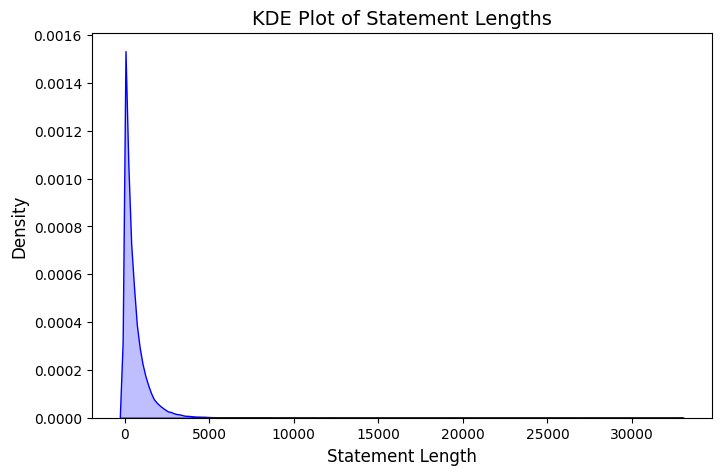

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='statement_length', shade=True, color='blue')
plt.title('KDE Plot of Statement Lengths', fontsize=14)
plt.xlabel('Statement Length', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

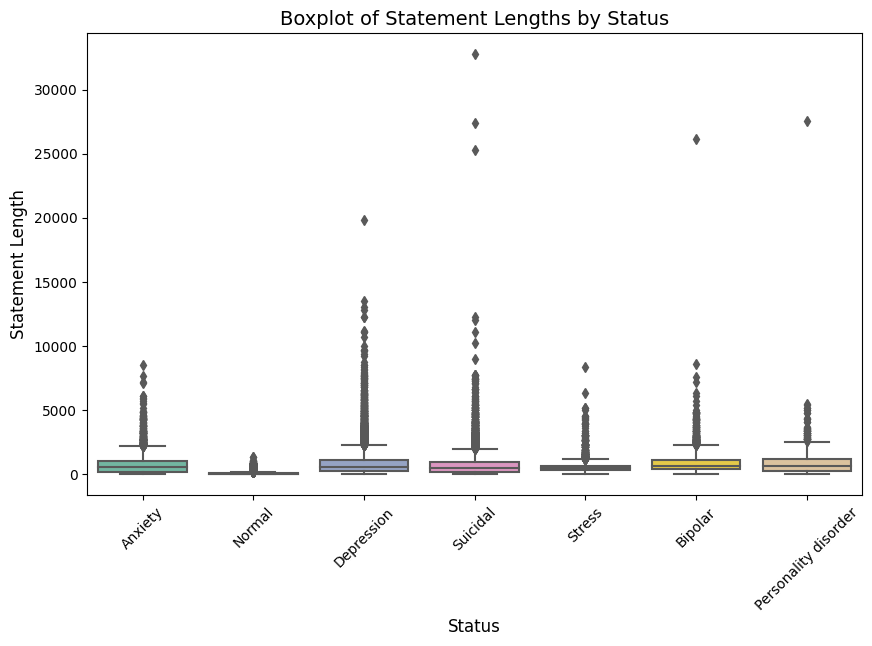

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='statement_length', palette='Set2')
plt.title('Boxplot of Statement Lengths by Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Statement Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()

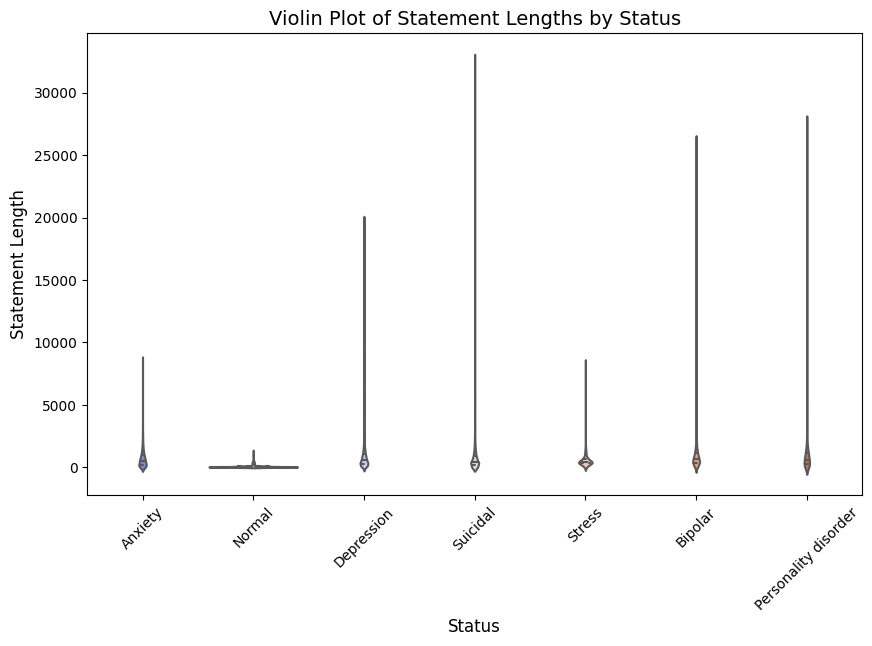

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='status', y='statement_length', palette='coolwarm', inner='quartile')
plt.title('Violin Plot of Statement Lengths by Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Statement Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()

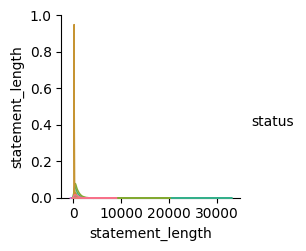

In [16]:
sns.pairplot(df, hue='status', palette='husl')
plt.show()

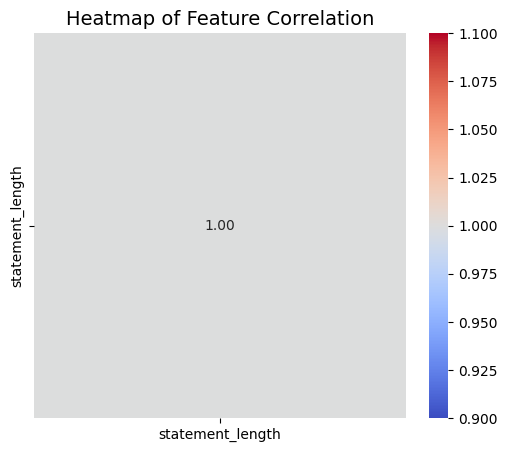

In [17]:
plt.figure(figsize=(6, 5))
corr = df[['statement_length']].corr()  # Replace with additional numerical features if available
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Heatmap of Feature Correlation', fontsize=14)
plt.show()

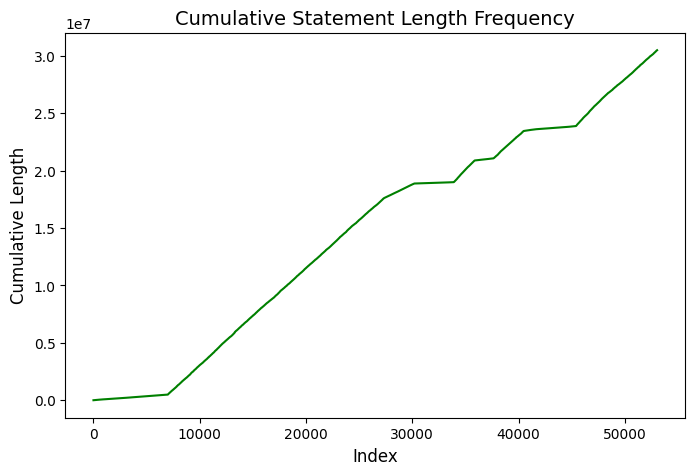

In [18]:
# 8. Line Plot: Cumulative statement length frequency
df['cumulative_length'] = df['statement_length'].cumsum()
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x=range(len(df)), y='cumulative_length', color='green')
plt.title('Cumulative Statement Length Frequency', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Cumulative Length', fontsize=12)
plt.show()

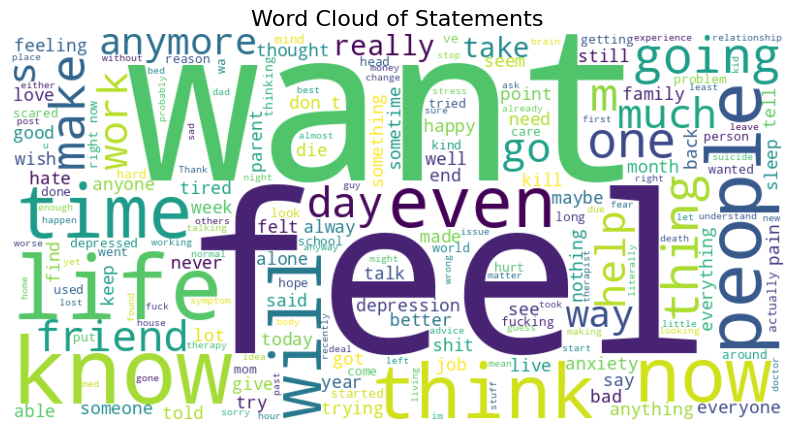

In [19]:
from wordcloud import WordCloud
text = " ".join(df['statement'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Statements', fontsize=16)
plt.show()

In [20]:
import plotly.express as px
fig = px.sunburst(df, path=['status'], values='statement_length',
                  title='Sunburst Chart of Mental Health Status Distribution')
fig.show()

In [21]:
most_frequent_statement = df['statement'].mode()[0]
df['statement'] = df['statement'].fillna(most_frequent_statement)


In [22]:
df.isnull().sum()

statement            0
status               0
statement_length     0
cumulative_length    0
dtype: int64

In [23]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])  # Encode target column

In [24]:
df

,statement,status,statement_length,cumulative_length
0,oh my gosh,0,10,10
1,"trouble sleeping, confused mind, restless hear...",0,64,74
2,"All wrong, back off dear, forward doubt. Stay ...",0,78,152
3,I've shifted my focus to something else but I'...,0,61,213
4,"I'm restless and restless, it's been a month n...",0,72,285
...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,0,1766,30486396
53039,"selfishness ""I don't feel very good, it's lik...",0,1012,30487408
53040,Is there any way to sleep better? I can't slee...,0,85,30487493
53041,"Public speaking tips? Hi, all. I have to give ...",0,401,30487894


In [25]:
X = df['statement']  # Feature: Text data
y = df['status']  # Target: Encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [ ]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Accuracy: 0.7570
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       778
           1       0.89      0.65      0.75       575
           2       0.69      0.74      0.71      3081
           3       0.83      0.95      0.89      3270
           4       0.64      0.45      0.53       240
           5       0.73      0.40      0.51       534
           6       0.69      0.66      0.67      2131

    accuracy                           0.76     10609
   macro avg       0.76      0.65      0.69     10609
weighted avg       0.76      0.76      0.75     10609

--------------------------------------------------
Training Naive Bayes...
Naive Bayes Accuracy: 0.6622
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       778
           1       0.88      0.47      0.61       575
           2       0.51      0.79      0.62      3081
           3 

In [ ]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.show()